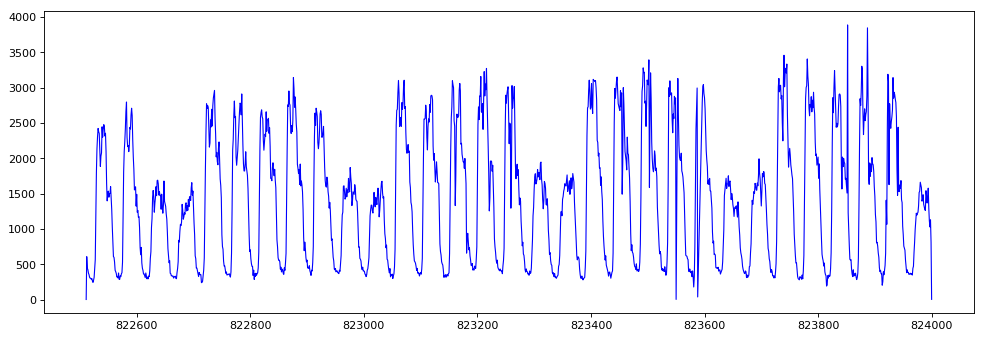

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

file_path = "result"

with open(file_path) as f:
    lines = f.readlines()

x=[]
y=[]
for line in lines:
    splited = line.split("\t")
    x.append(splited[0])
    y.append(splited[1].strip())

plt.figure("flow data", figsize=(15,5), dpi=80)
plt.plot(x, y, 'b-', lw=1)
plt.show()

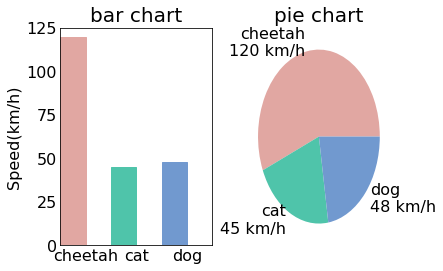

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# 通过rcParams设置全局横纵轴字体大小
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

# 包含了狗，猫和猎豹的最高奔跑速度，还有对应的可视化颜色
speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}

# 整体图的标题
fig = plt.figure('Bar chart & Pie chart')

# 在整张图上加入一个子图，121的意思是在一个1行2列的子图中的第一张
ax = fig.add_subplot(121)
ax.set_title('bar chart')

# 生成x轴每个元素的位置
xticks = np.arange(3)

# 定义柱状图每个柱的宽度
bar_width = 0.5

# 动物名称
animals = speed_map.keys()

# 奔跑速度
speeds = [x[0] for x in speed_map.values()]

# 对应颜色
colors = [x[1] for x in speed_map.values()]

# 画柱状图，横轴是动物标签的位置，纵轴是速度，定义柱的宽度，同时设置柱的边缘为透明
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none')

# 设置y轴的标题
ax.set_ylabel('Speed(km/h)')

# x轴每个标签的具体位置，设置为每个柱的中央
ax.set_xticks(xticks+bar_width/2)

# 设置每个标签的名字
ax.set_xticklabels(animals)

# 设置x轴的范围
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])

# 设置y轴的范围
ax.set_ylim([0, 125])

# 给每个bar分配指定的颜色
for bar, color in zip(bars, colors):
    bar.set_color(color)

# 在122位置加入新的图
ax = fig.add_subplot(122)
ax.set_title('pie chart')

# 生成同时包含名称和速度的标签
labels = ['{}\n{} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]

# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)

plt.show()

## pylab

pylab 是 matplotlib 面向对象绘图库的一个接口。它的语法和 Matlab 十分相近。也就是说，它主要的绘图命令和 Matlab 对应的命令有相似的参数。



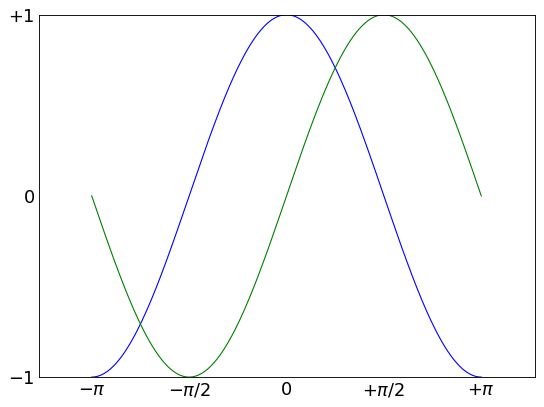

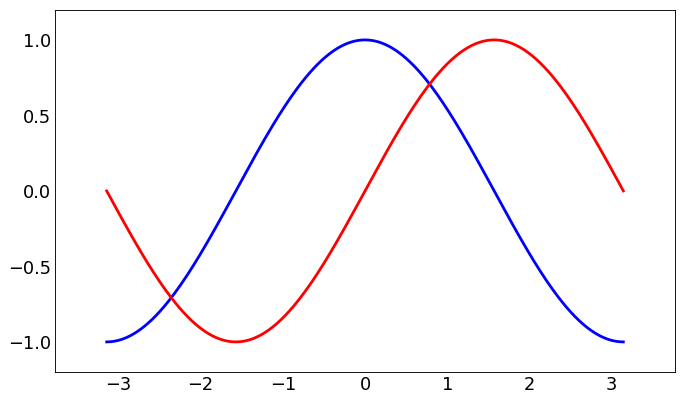

In [29]:
# 导入 matplotlib 的所有内容（nympy 可以用 np 这个名字来使用）
from pylab import *

# 创建一个 8 * 6 点（point）的图，并设置分辨率为 80
figure(figsize=(8,6), dpi=80)

# 创建一个新的 1 * 1 的子图，接下来的图样绘制在其中的第 1 块（也是唯一的一块）
subplot(1,1,1)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# 绘制余弦曲线，使用蓝色的、连续的、宽度为 1 （像素）的线条
plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# 绘制正弦曲线，使用绿色的、连续的、宽度为 1 （像素）的线条
plot(X, S, color="green", linewidth=1.0, linestyle="-")

# 设置轴的上下限
xlim(-4.0,4.0)
ylim(-1.0,1.0)

# 设置轴记号
xticks(np.linspace(-4,4,9,endpoint=True))
yticks(np.linspace(-1,1,5,endpoint=True))

# 更好的设置轴记号的位置和自定义标签
xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])



# 加上第二幅图片，并改变线条和粗细
figure(figsize=(10,6), dpi=80)
plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plot(X, S, color="red",  linewidth=2.5, linestyle="-")

# 图片四周留白
xmin ,xmax = X.min(), X.max()
ymin, ymax = C.min(), C.max()
dx = (xmax - xmin) * 0.1
dy = (ymax - ymin) * 0.1
xlim(xmin - dx, xmax + dx)
ylim(ymin - dy, ymax + dy)

# 以分辨率 72 来保存图片
# savefig("exercice_2.png",dpi=72)

# 在屏幕上显示
show()

## 移动脊柱
坐标轴线和上面的记号连在一起就形成了脊柱，它记录了数据区域的范围。
它们可以放在任意位置，不过至今为止，我们都把它放在图的四边。

实际上每幅图有四条脊柱（上下左右），为了将脊柱放在图的中间，我们必须将其中的两条（上和右）设置为无色，然后调整剩下的两条到合适的位置——数据空间的 0 点。

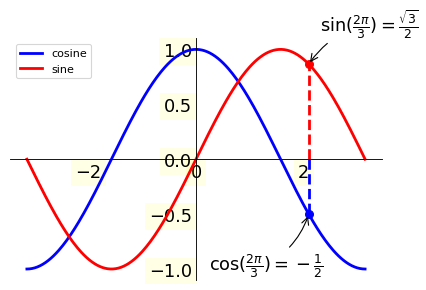

In [62]:
figure("ex",figsize=(6,4),dpi=80)
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)
plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

# 移动脊柱
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# 在左上角增加图例
legend(loc='upper left')

# 在我们关心的特殊点添加注释
t = 2*np.pi/3
plot([t,t],[0,np.cos(t)], color ='blue', linewidth=2.5, linestyle="--")
scatter([t,],[np.cos(t),], 50, color ='blue')

annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
         xy=(t, np.sin(t)), xycoords='data',
         xytext=(+10, +30), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plot([t,t],[0,np.sin(t)], color ='red', linewidth=2.5, linestyle="--")
scatter([t,],[np.sin(t),], 50, color ='red')

annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
         xy=(t, np.cos(t)), xycoords='data',
         xytext=(-90, -50), textcoords='offset points', fontsize=16,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))



# 为了防止轴标签看起来有所遮挡，可以把标签放大，然后添加一个半透明底色。这样可以保证标签和曲线同时可见。
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='yellow', edgecolor='None', alpha=0.1))



show()

## 图像、子图、坐标轴和记号

到目前为止，我们都用隐式的方法来绘制图像和坐标轴。快速绘图中，这是很方便的。我们也可以显式地控制图像、子图、坐标轴。Matplotlib 中的「图像」指的是用户界面看到的整个窗口内容。在图像里面有所谓「子图」。子图的位置是由坐标网格确定的，而「坐标轴」却不受此限制，可以放在图像的任意位置。我们已经隐式地使用过图像和子图：当我们调用 plot 函数的时候，matplotlib 调用 gca() 函数以及 gcf() 函数来获取当前的坐标轴和图像；如果无法获取图像，则会调用 figure() 函数来创建一个——严格地说，是用 subplot(1,1,1) 创建一个只有一个子图的图像。

## 图像

所谓「图像」就是 GUI 里以「Figure #」为标题的那些窗口。图像编号从 1 开始，与 MATLAB 的风格一致，而于 Python 从 0 开始编号的风格不同。以下参数是图像的属性,可以再figure函数中进行设置。


|参数 	|默认值|描述|
|--------|-------|
|num 	|1 |	图像的数量|
|figsize |	figure.figsize |	图像的长和宽（英寸）|
|dpi 	|figure.dpi| 	分辨率（点/英寸）|
|facecolor| 	figure.facecolor| 	绘图区域的背景颜色|
|edgecolor |	figure.edgecolor |	绘图区域边缘的颜色|
|frameon 	|True| 	是否绘制图像边缘|


这些默认值可以在源文件中指明。不过除了图像数量这个参数，其余的参数都很少修改。

你在图形界面中可以按下右上角的 X 来关闭窗口（OS X 系统是左上角）。Matplotlib 也提供了名为 close 的函数来关闭这个窗口。close 函数的具体行为取决于你提供的参数：

1. 不传递参数：关闭当前窗口；
2. 传递窗口编号或窗口实例（instance）作为参数：关闭指定的窗口；
3. all：关闭所有窗口。

和其他对象一样，你可以使用 setp 或者是 set_something 这样的方法来设置图像的属性。

## 子图

你可以用子图来将图样（plot）放在均匀的坐标网格中。用 subplot 函数的时候，你需要指明网格的行列数量，以及你希望将图样放在哪一个网格区域中。此外，gridspec 的功能更强大，你也可以选择它来实现这个功能。

## axes

axes和子图功能类似，不过它可以放在图像的任意位置。因此，如果你希望在一副图中绘制一个小图，就可以用这个功能。

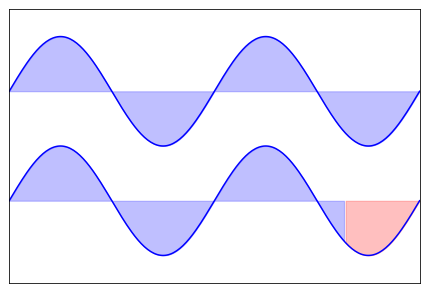

In [88]:
# 普通图
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.axes([0.025,0.025,0.95,0.95])

# 填充颜色
plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.fill_between(X, 1, Y+1, color='blue', alpha=.25)

# 选择性填充颜色
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, -1, Y-1, (Y-1) > -1, color='blue', alpha=.25)
plt.fill_between(X, -1, Y-1, (Y-1) < -1, color='red',  alpha=.25)

# 设置轴范围，消除轴标签
plt.xlim(-np.pi,np.pi), plt.xticks([])
plt.ylim(-2.5,2.5), plt.yticks([])
# savefig('../figures/plot_ex.png',dpi=48)
plt.show()


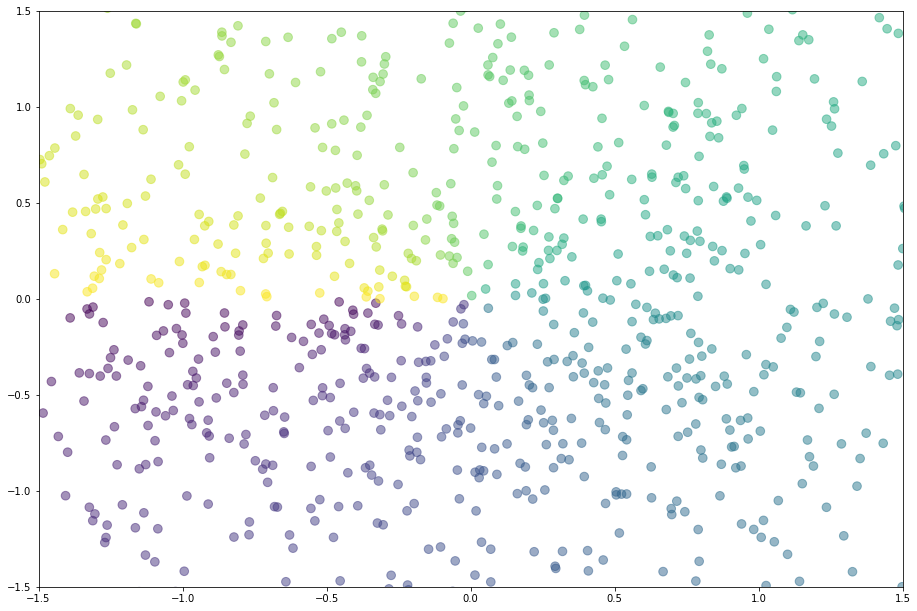

In [22]:
# 散点图
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

#还没明白这个函数的作用
plt.axes([1,1,2,2])
# s属性设置点的大小，c设置点的颜色
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5)#, plt.xticks([])
plt.ylim(-1.5,1.5)#, plt.yticks([])
# savefig('../figures/scatter_ex.png',dpi=48)
plt.show()


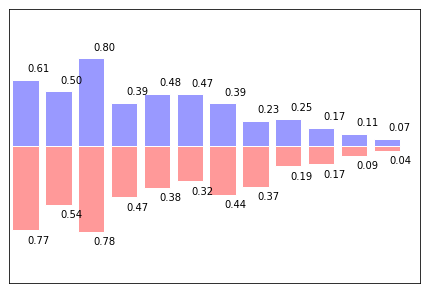

In [113]:
# 条形图
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.axes([0.025,0.025,0.95,0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

for x,y in zip(X,Y2):
    plt.text(x+0.4, -y-0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5,n), plt.xticks([])
plt.ylim(-1.25,+1.25), plt.yticks([])

# savefig('../figures/bar_ex.png', dpi=48)
plt.show()


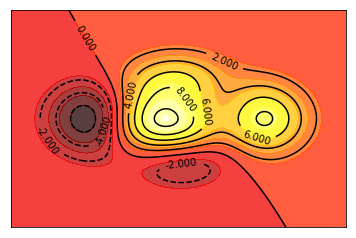

In [15]:
# 等高线图
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)*10

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

# 绘制等值线图， 其实输入变量不含X，Y也是可以的，第四个参数是等高线的数量，cmap是配色方案，这个不手动设置的话，默认方案也挺好看的其实
plt.contourf(X, Y, f(X,Y),15, alpha=.75, cmap=plt.cm.hot)

# 绘制等高线
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)

# 设置等高线上的标签
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])
# savefig('../figures/contour_ex.png',dpi=48)
plt.show()


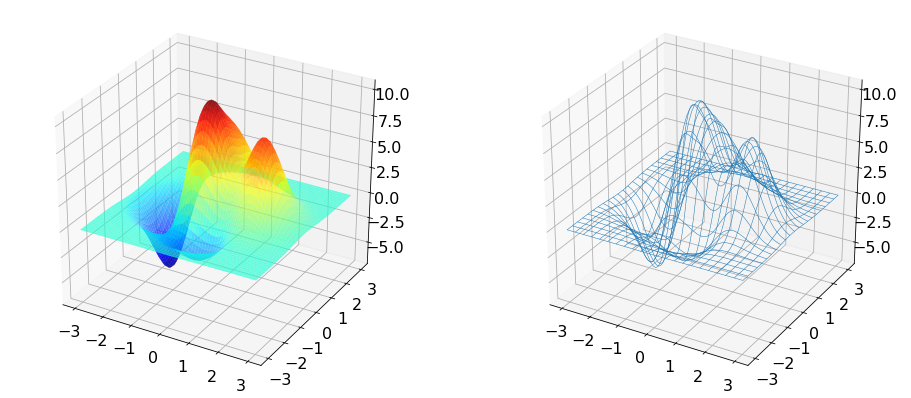

In [170]:
# 上面那个图的3D版本

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     

def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)*10

# 把采样点数目降低，不然绘制速度会明显变慢很多
n = 64
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)
Z=f(X,Y)
fig = plt.figure('3D surface & wire',figsize=(16,7))

# 第一个子图，surface图
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='jet', rstride=1, cstride=1, lw=0)

# 第二个子图，网线图
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, lw=0.5)

plt.show()

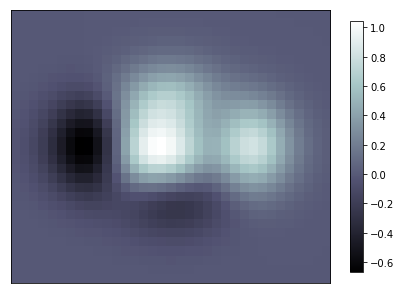

In [23]:
# 还是那个图的灰度图版本
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 10
x = np.linspace(-3,3,int(3.5*n))
y = np.linspace(-3,3,int(3.0*n))
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.axes([0.025,0.025,0.95,0.95])
plt.imshow(Z,interpolation='nearest', cmap='bone', origin='lower')

# 设置长度条长度比例，不一定要小于1，设置为0.92舍得上下不顶格
plt.colorbar(shrink=.92)

plt.xticks([]), plt.yticks([])
plt.show()


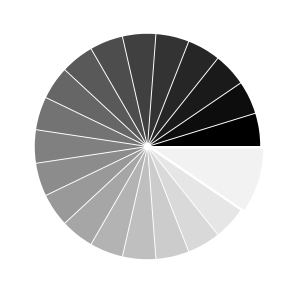

In [30]:
# 饼状图
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# 设置扇区个数，起始扇区从横轴正方向开始计算，设置最后一个扇区面积为2
n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.axes([0.025,0.025,0.95,0.95])

# 绘制饼图，explode参数决定扇区之间的间隙
plt.pie(Z, explode=Z*.03, colors = ['%f' % (i/float(n)) for i in range(n)])

# 涉及到gca的函数都有点不太明白
plt.gca().set_aspect('equal')


plt.xticks([]), plt.yticks([])
plt.show()


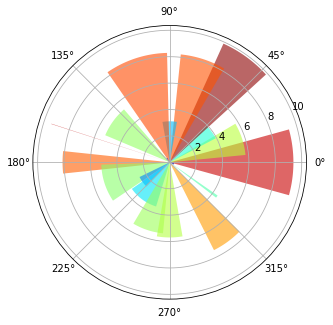

In [41]:
# 极轴图
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# 虽然我不太明白axes这个函数，但是polar参数应该是设置极坐标轴
ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 20
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)

# 随机设置半径大小和扇面宽度
radii = 10*np.random.rand(N)
width = np.pi/4*np.random.rand(N)


bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.6)

# ax.set_xticklabels([])
# ax.set_yticklabels([])
plt.show()


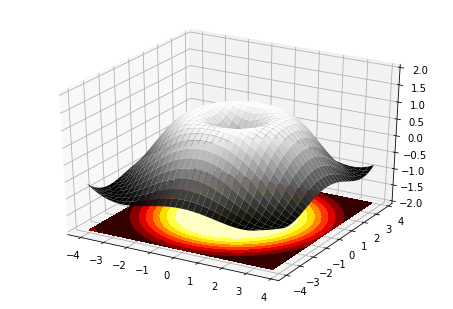

In [55]:
# 另一个3D图
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="gray")
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap="hot")
ax.set_zlim(-2,2)

# savefig('../figures/plot3d_ex.png',dpi=48)
plt.show()


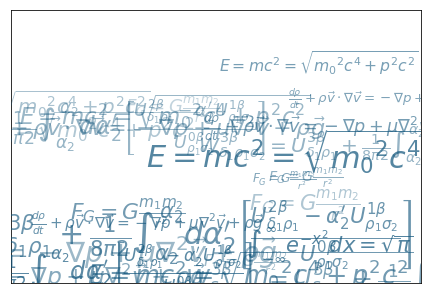

In [43]:
# 手稿
# -----------------------------------------------------------------------------
# Copyright (c) 2015, Nicolas P. Rougier. All Rights Reserved.
# Distributed under the (new) BSD License. See LICENSE.txt for more info.
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))


plt.axes([0.025,0.025,0.95,0.95])

for i in range(24):
    index = np.random.randint(0,len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12,32)
    x,y = np.random.uniform(0,1,2)
    alpha = np.random.uniform(0.25,.75)
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
             transform=plt.gca().transAxes, fontsize=size, clip_on=True)

plt.xticks([]), plt.yticks([])
# savefig('../figures/text_ex.png',dpi=48)
plt.show()


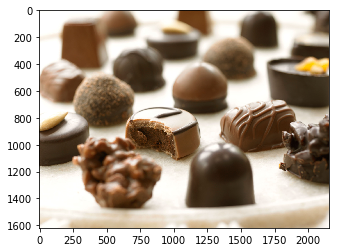

In [53]:
# 图像处理
import matplotlib.pyplot as plt

# 读取一张小白狗的照片并显示
plt.figure('A Little White Dog')
little_dog_img = plt.imread('chocolate.jpg')
plt.imshow(little_dog_img)


plt.show()

## 画廊

Matplotlib 画廊也非常有用。其中的例子都有配图和对应的代码，当你不知道某一个效果如何实现的时候，你可以在这里找找。

参考链接中给出了一个小画廊。

## 快速查询

你可以在这里找到 Matplotlib 主要的属性表，以便按照需求个性化配置你的输出图样。

## 参考
1. Matplotlib 教程：http://blog.csdn.net/u011497262/article/details/52325705
2. matplotlib小图库：http://www.labri.fr/perso/nrougier/coding/gallery/
3. 给深度学习入门者的Python快速教程 - numpy和Matplotlib篇：https://zhuanlan.zhihu.com/p/24309547